# Online Store

in this project together with the marketing department, we will compile a list of hypotheses that may help boost revenue 

the purpose of the project is to test the hypotheses that will help us to learn about the performance of two groups A and B.
first of all we will prioritize the hypotheses:
1. applying the ICE framework 
2. applying the RICE framework 
second. we are going to analyze the A/B test
1. calculate the cumulative revenue for each group and then to compare the groups 
2. calculate the cumulative average order size by group and then to compare the groups
3. we will check if we have outliers to make sure that the difference between the groups didn't come from the outliers.
then we will find the statistical significance for each metrics we calculated 

# Initialization

In [1]:
# Loading all the libraries
import pandas as pd 
pd.set_option('max_colwidth', 200)
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import levene
import scipy.stats as stats
import datetime as dt
import matplotlib
import statistics


# Load data

In [2]:
try:
    hypotheses_us = pd.read_csv('/datasets/hypotheses_us.csv', sep=';',dtype={'Hypothesis':'category'})
except:
    hypotheses_us = pd.read_csv(r'C:\Users\Alar\Downloads\hypotheses_us.csv', sep=';',dtype={'Hypothesis':'category'})
hypotheses_us.columns=hypotheses_us.columns.str.lower()

In [3]:
hypotheses_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   hypothesis  9 non-null      category
 1   reach       9 non-null      int64   
 2   impact      9 non-null      int64   
 3   confidence  9 non-null      int64   
 4   effort      9 non-null      int64   
dtypes: category(1), int64(4)
memory usage: 797.0 bytes


In [4]:
try:
    orders_us = pd.read_csv('/datasets/orders_us.csv')
except:
    orders_us = pd.read_csv(r'C:\Users\Alar\Downloads\orders_us.csv')
    
orders_us['date'] = orders_us['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
    
orders_us.columns=orders_us.columns.str.lower()
orders_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1197 non-null   int64         
 1   visitorid      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


In [5]:
try:
    visits_us = pd.read_csv('/datasets/visits_us.csv')
except:
    visits_us = pd.read_csv(r'C:\Users\Alar\Downloads\visits_us.csv')
visits_us['date'] = visits_us['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
visits_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


# Explore initial data

**Data used in the first part of the project**
<br>hypotheses_us<br>
Hypotheses — brief descriptions of the hypotheses<br>
Reach — user reach, on a scale of one to ten<br>
Impact — impact on users, on a scale of one to ten<br>
Confidence — confidence in the hypothesis, on a scale of one to ten<br>
Effort — the resources required to test a hypothesis, on a scale of one to ten.<br>
The higher the Effort value, the more resource-intensive the test

**Data used in the second part of the project**
<br>orders_us<br>
transactionId — order identifier<br>
visitorId — identifier of the user who placed the order<br>
date — of the order<br>
revenue — from the order<br>
group — the A/B test group that the user belongs to. <br>
<br>
visits_us<br>
date — date<br>
group — A/B test group<br>
visits — the number of visits on the date specified in the A/B test group specified<br>

/datasets/visits_us.csv
date — date
group — A/B test group
visits — the number of visits on the date specified in the A/B test group
specified

## Prepare the data

In [6]:
hypotheses_us.head(10)

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


In [7]:
orders_us.head(20)

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B
6,398296753,2900797465,2019-08-15,30.6,B
7,2626614568,78758296,2019-08-15,20.1,A
8,1576988021,295230930,2019-08-15,215.9,A
9,1506739906,1882260405,2019-08-15,30.5,B


In [8]:
visits_us.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [9]:
visits_us.duplicated().sum()

0

In [10]:
visits_us['date'].value_counts()

2019-08-01    2
2019-08-17    2
2019-08-30    2
2019-08-29    2
2019-08-28    2
2019-08-27    2
2019-08-26    2
2019-08-25    2
2019-08-24    2
2019-08-23    2
2019-08-22    2
2019-08-21    2
2019-08-20    2
2019-08-19    2
2019-08-18    2
2019-08-16    2
2019-08-02    2
2019-08-15    2
2019-08-14    2
2019-08-13    2
2019-08-12    2
2019-08-11    2
2019-08-10    2
2019-08-09    2
2019-08-08    2
2019-08-07    2
2019-08-06    2
2019-08-05    2
2019-08-04    2
2019-08-03    2
2019-08-31    2
Name: date, dtype: int64

for evey date we have two record for both groups so that is great

some of the visitors might have gotten into both group
A and group B.<br>
we are going to check that :

In [11]:
order_a = orders_us.query('group == "A"')
order_b = orders_us.query('group == "B"')
two_groups = pd.merge(order_a, order_b, how='inner', on = ['visitorid'])

bad_list = two_groups['visitorid']


In [12]:
two_groups['visitorid'].nunique()

58

58 users appear in both groups, I decided to delete those users from the data since they are relatively few rows for all the data 

In [13]:
# the reviewer's cell:
len(orders_us.groupby('visitorid').agg({'group':'nunique'}).query('group > 1'))

58

In [14]:
full_orders= orders_us.copy()
orders_us = orders_us[~orders_us['visitorid'].isin(bad_list)]
orders_us.info()
full_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1016 non-null   int64         
 1   visitorid      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   float64       
 4   group          1016 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 47.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1197 non-null   int64         
 1   visitorid      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object 

**Intermediate conclusion**<br>
In the last steps, we changed the data type to columns where needed. also, we checked if we have duplicates and we saw that we had the same id number in both groups we drop those rows from the dataframe in order to continue working for A/B testing.
iltered users who were in several groups. But in the visitors dataset, the data were aggregated by date, so we could not drop these users from visitors data. In this case, it is better to keep the data as they are (because we will decrease the conversion values) 
It's clear that the data is sufficient to test the hypotheses. 

## Prioritizing Hypotheses

The file hypotheses_us.csv contains nine hypotheses on boosting an online
store's revenue with Reach , Impact , Confidence , and Effort specified for each.

### Apply the ICE framework to prioritize hypotheses. Sort them in descending order of priority.

ice = impact x confidence x ease <br>
ice = (impact x confidence) / effort <br>
rice score = (reach x impact x confidence) / effort 

In [15]:
hypotheses_us['ICE'] = (hypotheses_us['impact']* hypotheses_us['confidence'])/ hypotheses_us['effort']
hypotheses_us['ICE'] = hypotheses_us['ICE'].apply(np.ceil)
print(hypotheses_us[['hypothesis','ICE']].sort_values(by='ICE', ascending=False))

                                                                                                               hypothesis  \
8                                                        Launch a promotion that gives users discounts on their birthdays   
0                                             Add two new channels for attracting traffic. This will bring 30% more users   
7                                Add a subscription form to all the main pages. This will help you compile a mailing list   
6                                 Show banners with current offers and sales on the main page. This will boost conversion   
2          Add product recommendation blocks to the store's site. This will increase conversion and average purchase size   
1                                                       Launch your own delivery service. This will shorten delivery time   
3  Change the category structure. This will increase conversion since users will find the products they want more quickly   


**8, 0 , 7 the most promising hypotheses <br>
8 :Launch a promotion that gives users discounts on their birthdays <br>
0 :Add two new channels for attracting traffic. This will bring 30% more users<br>
7: Add a subscription form to all the main pages. This will help you compile a mailing list<br>**

**Applying the RICE framework to prioritize hypotheses. and sorting them in
descending order of priority**

In [16]:
hypotheses_us['RICE'] = (hypotheses_us['reach']*hypotheses_us['impact']*hypotheses_us['confidence'])/hypotheses_us['effort']
print(hypotheses_us[['hypothesis','RICE']].sort_values(by='RICE',ascending= False))

                                                                                                               hypothesis  \
7                                Add a subscription form to all the main pages. This will help you compile a mailing list   
2          Add product recommendation blocks to the store's site. This will increase conversion and average purchase size   
0                                             Add two new channels for attracting traffic. This will bring 30% more users   
6                                 Show banners with current offers and sales on the main page. This will boost conversion   
8                                                        Launch a promotion that gives users discounts on their birthdays   
3  Change the category structure. This will increase conversion since users will find the products they want more quickly   
1                                                       Launch your own delivery service. This will shorten delivery time   


**and again we can see the most promising hypotheses is :<br> 
7 : 'Add a subscription form to all the main pages. This will help you compile a mailing list '<br> 
0:'Add two new channels for attracting traffic. This will bring 30% more users' <br>
but this time hypothesis 8 replaeced with hypothesis number 2 :' Add product recommendation blocks to the store's site. This will increase conversion and average purchase size' <br> 
however this time number 7 in the first place. that's because its reach parameter is 10, while the other hypotheses have lower values**

## Part 2. A/B Test Analysis

### Graph cumulative revenue by group. Make conclusions and conjectures.

In [17]:
 # building an array with unique paired date-group values
datesGroups = orders_us[['date','group']].drop_duplicates()

# getting aggregated cumulative daily data on orders 
ordersAggregated = datesGroups.apply(lambda x: orders_us[np.logical_and(orders_us['date'] <= x['date'], orders_us['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionid' : pd.Series.nunique, 'visitorid' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# getting aggregated cumulative daily data on visitors  
visitorsAggregated = datesGroups.apply(lambda x: visits_us[np.logical_and(visits_us['date'] <= x['date'], visits_us['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])

# merging the two tables into one and giving its columns descriptive names
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visits']
print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visits
0 2019-08-01     A      23      19   2266.6     719
1 2019-08-01     B      17      17    967.2     713
2 2019-08-02     A      42      36   3734.9    1338
3 2019-08-02     B      40      39   3535.3    1294
4 2019-08-03     A      66      60   5550.1    1845


Let's plot cumulative revenue graphs by day and A/B test group:

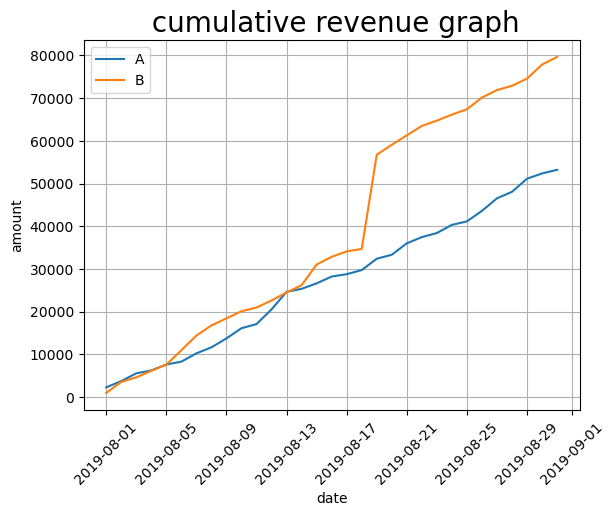

In [18]:
# DataFrame with cumulative orders and cumulative revenue by day, group A
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# DataFrame with cumulative orders and cumulative revenue by day, group B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Plotting the group A revenue graph 
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Plotting the group B revenue graph 
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title(' cumulative revenue graph', fontsize =20)
plt.xlabel('date')
plt.xticks(fontsize=10, rotation=45)
plt.ylabel('amount')
plt.legend()
plt.grid()
plt.show()

**Revenue is rising steadily throughout the whole test.**
<br>
**However, we can see that group b has spikes in revenue at certain points. This may imply either a surge in the number of orders or the presence of very expensive orders in the sample.**

### Graph cumulative average order size by group. Make conclusions and conjectures.

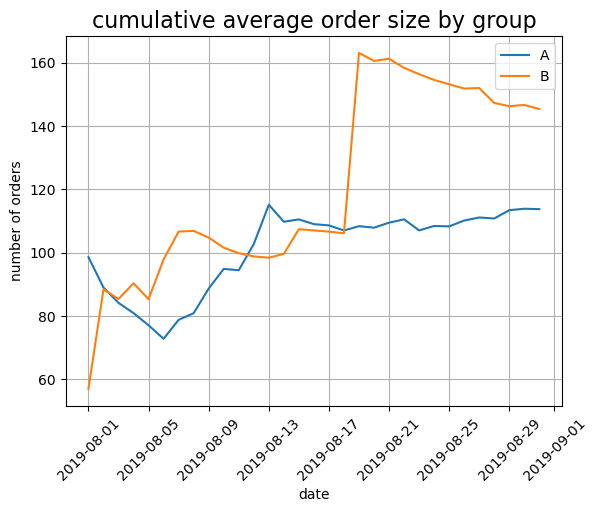

In [19]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('cumulative average order size by group', fontsize= 16)
plt.xlabel('date')
plt.xticks(fontsize=10, rotation=45)
plt.ylabel('number of orders')
plt.legend()
plt.grid()
plt.show()

**Average purchase size becomes steady by the end of the test, too: it stabilizes for group A and keeps on falling for group B. The surge in group B in the first half of the test may have been due to the presence of large, expensive orders. We need more data on this group to find the true average purchase size and establish its level.**

### Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures

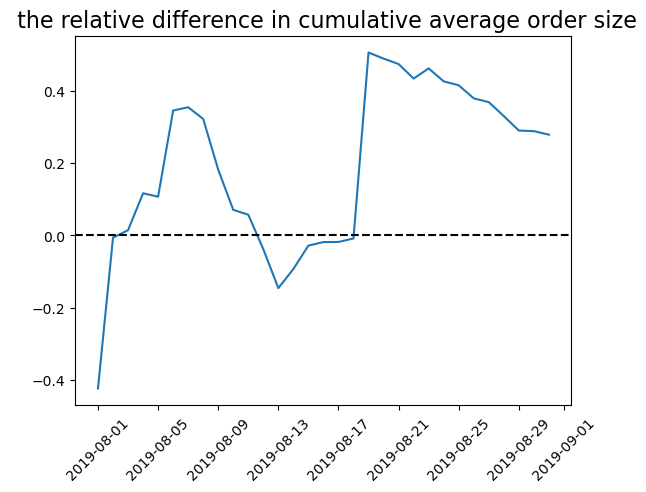

In [20]:
# gathering the data into one DataFrame
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.title(' the relative difference in cumulative average order size', fontsize= 16)
# plotting a relative difference graph for the average purchase sizes
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# adding the X axis
plt.axhline(y=0, color='black', linestyle='--') 
plt.xticks(fontsize=10, rotation=45)
plt.show()

**At several points the difference between the segments spikes. This means there must be some big orders and outliers**

### Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.


In [21]:
# calculating cumulative conversion
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visits']
cumulativeData.head()

,date,group,orders,buyers,revenue,visits,conversion
0,2019-08-01,A,23,19,2266.6,719,0.031989
1,2019-08-01,B,17,17,967.2,713,0.023843
2,2019-08-02,A,42,36,3734.9,1338,0.031390
3,2019-08-02,B,40,39,3535.3,1294,0.030912
4,2019-08-03,A,66,60,5550.1,1845,0.035772


In [22]:
# selecting data on group A 
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataA.head()

,date,group,orders,buyers,revenue,visits,conversion
0,2019-08-01,A,23,19,2266.6,719,0.031989
2,2019-08-02,A,42,36,3734.9,1338,0.031390
4,2019-08-03,A,66,60,5550.1,1845,0.035772
6,2019-08-04,A,77,71,6225.6,2562,0.030055
8,2019-08-05,A,99,92,7623.6,3318,0.029837


In [23]:
convertion_a = cumulativeDataA['orders']/cumulativeDataA['visits']
convertion_a.head()

0    0.031989
2    0.031390
4    0.035772
6    0.030055
8    0.029837
dtype: float64

In [24]:
print('conviration rate average observation for group A:')
statistics.mean(convertion_a)

conviration rate average observation for group A:


0.026870768645692805

In [25]:
# selecting data on group B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
cumulativeDataB.head()

,date,group,orders,buyers,revenue,visits,conversion
1,2019-08-01,B,17,17,967.2,713,0.023843
3,2019-08-02,B,40,39,3535.3,1294,0.030912
5,2019-08-03,B,54,53,4606.9,1803,0.029950
7,2019-08-04,B,68,66,6138.5,2573,0.026428
9,2019-08-05,B,89,87,7587.8,3280,0.027134


In [26]:
convertion_b = cumulativeDataB['orders']/cumulativeDataB['visits']
convertion_b.head()

1    0.023843
3    0.030912
5    0.029950
7    0.026428
9    0.027134
dtype: float64

In [27]:
print('conviration rate average observation for group B:')
statistics.mean(convertion_b)

conviration rate average observation for group B:


0.0292824556911331

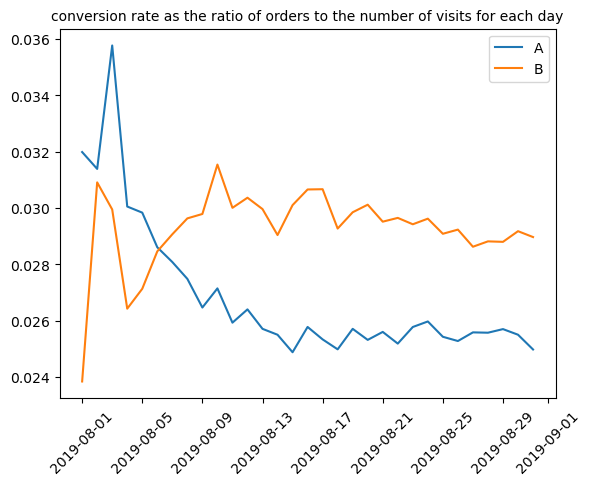

In [28]:
# plotting the graphs
plt.title('conversion rate as the ratio of orders to the number of visits for each day', fontsize= 10)
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.xticks(fontsize=10, rotation=45)
plt.show()

**At the beginning of the test,group A had a higher conversion rate, but group B gradually gained but with fluctuation. in general the average purchase size are not stable, but we can see clearly that group B is acting in a great way than group A** 

**Let's plot a relative difference graph for the cumulative conversion rates:**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


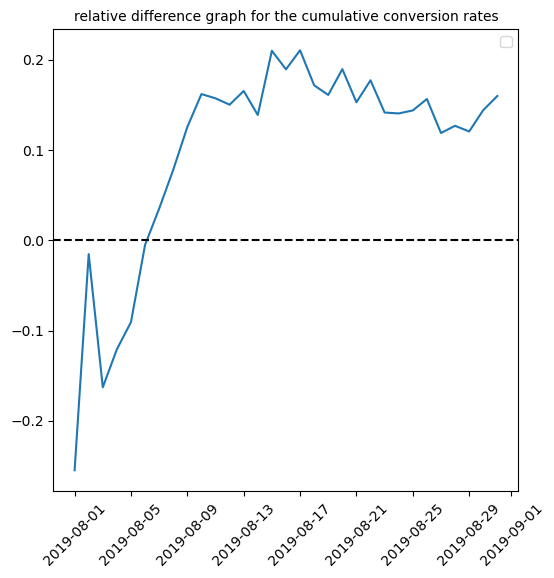

<Figure size 2000x2000 with 0 Axes>

In [29]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(6, 6)) 
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.legend()
plt.title('relative difference graph for the cumulative conversion rates', fontsize= 10)
plt.xticks(fontsize=10, rotation=45)
plt.axhline(y=0, color='black', linestyle='--')
plt.figure(figsize=(20,20))
plt.show()

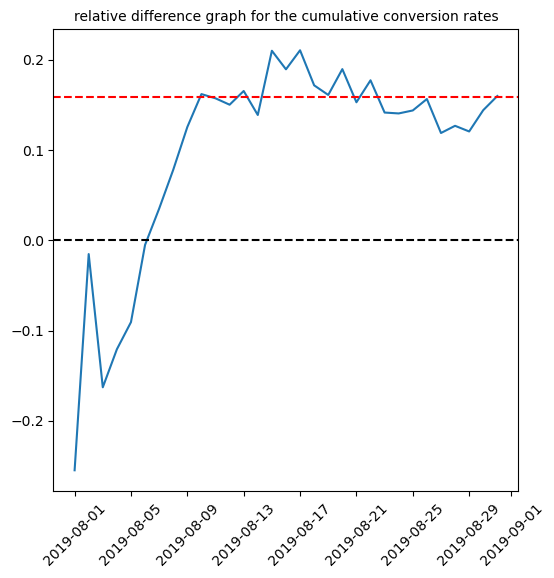

In [30]:
# the reviewer's code: the line show stabilisation of the metric
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(6, 6)) 
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.title('relative difference graph for the cumulative conversion rates', fontsize= 10)
plt.xticks(fontsize=10, rotation=45)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=((mergedCumulativeConversions.query('date > "2019-08-10"')['conversionB']/\
mergedCumulativeConversions.query('date > "2019-08-10"')['conversionA'] - 1).mean()), color='red', linestyle='--')
plt.show()

**at the beginning of the test, group B was lagging behind noticeably, but then it suddenly took the lead. Then its conversion fell again, and now it's growing gradually.**

### Plot a scatter chart of the number of orders per user. Make conclusions and conjectures

In [31]:
ordersByUsers = (
    orders_us.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)

ordersByUsers.columns = ['visitorid', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(15))

      visitorid  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3
138   611059232       3
632  2742574263       3
157   678354126       2
323  1404560065       2
452  1985475298       2
118   522292794       2
628  2733145037       2
634  2744017357       2
407  1772171838       2
548  2397843657       2


There are users with 2,3 orders. That's a lot more than a regular user would place in a week.

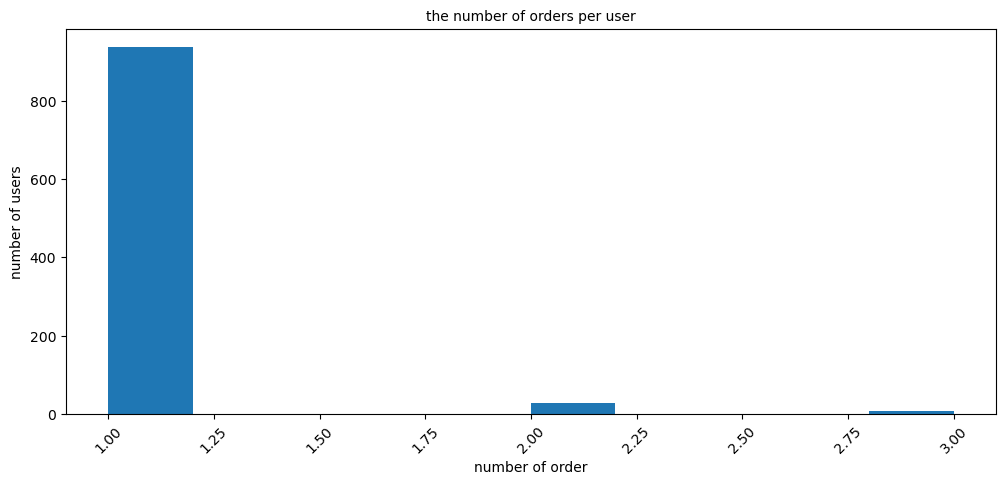

In [32]:
# Let's plot a distribution histogram with the number of orders per user.
plt.figure(figsize=(12,5)) 
plt.hist(ordersByUsers['orders']) 
plt.title('the number of orders per user', fontsize= 10)
plt.xlabel('number of order')
plt.xticks(fontsize=10, rotation=45)
plt.ylabel('number of users')
plt.show()

**The majority of customers placed only one order. However, a significant share placed two to four apiece.

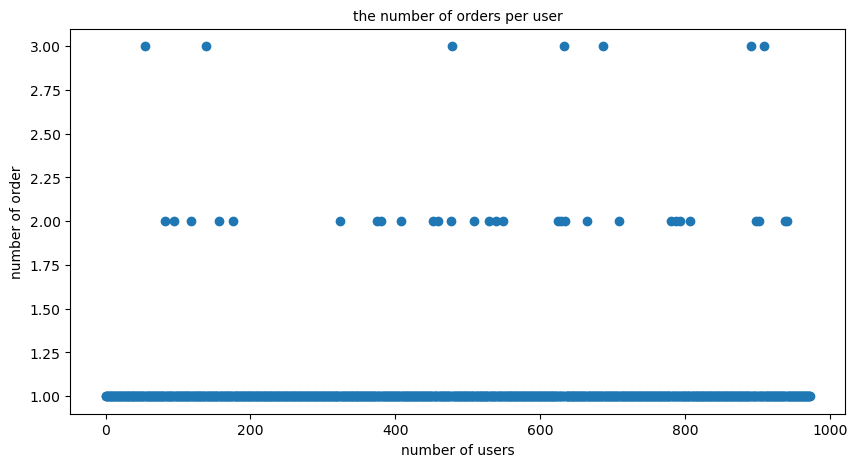

In [33]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(10,5)) 
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('the number of orders per user', fontsize= 10)
plt.xlabel('number of users')
plt.ylabel('number of order')
plt.show()

**Our conclusions are confirmed: there are indeed a lot of users with two to three orders. The exact share remains unknown, since it's not clear whether we should consider them anomalies or not.**


### Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.

In [34]:
print(np.percentile(ordersByUsers['orders'], [90, 95, 99])) 

[1. 1. 2.]


**most of users had only 1 order, and 10% of users made  more than that .
Thus, it would be reasonable to set 1 order per user as the lower limit for the number of orders and to filter anomalies on that basis.**

### Plot a scatter chart of order prices. Make conclusions and conjectures.


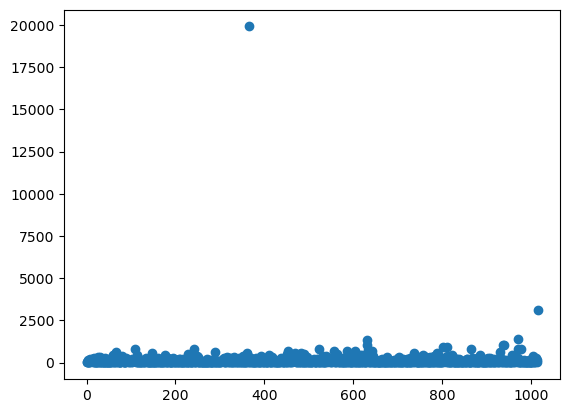

In [35]:
x_values = pd.Series(range(0, len(orders_us['revenue'])))
plt.scatter(x_values, orders_us['revenue']) 
plt.show()

<AxesSubplot:xlabel='transactionid', ylabel='revenue'>

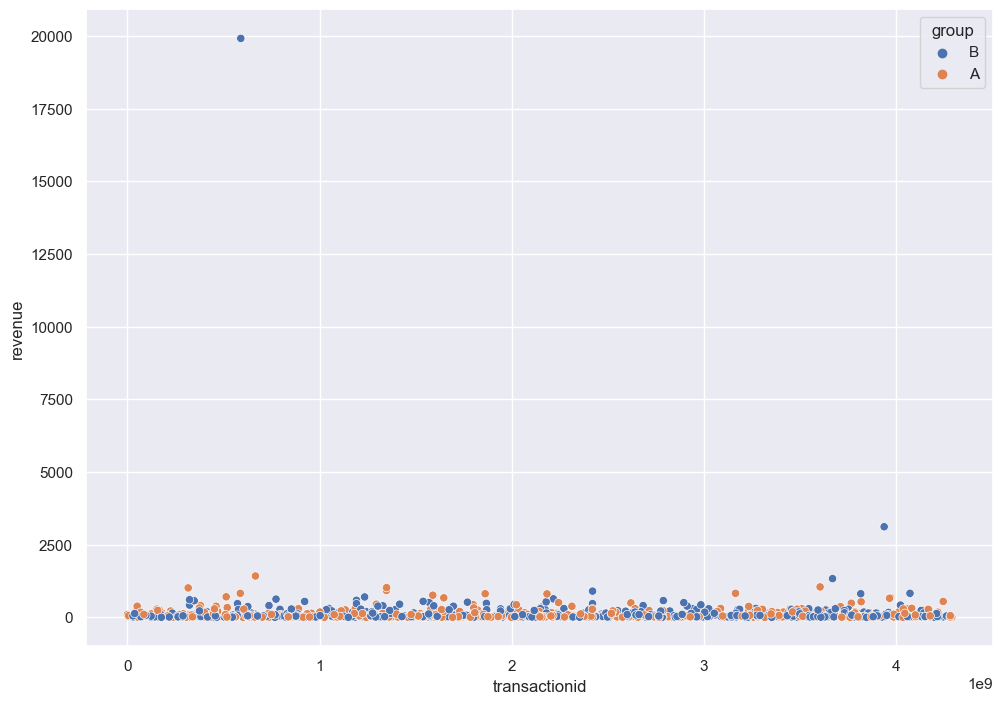

In [36]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=orders_us, x="transactionid", y="revenue", hue='group')


there are several big orders for group B. Based on the graph, we can set the limit for abnormal orders between $200 and $1000. 

### Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.

In [37]:
print(np.percentile(orders_us['revenue'], [90, 95, 99])) 

[280.8   414.275 830.3  ]


**No more than 5% of orders cost more than 414.275, and no more than 1 percent cost more than $830.3**

### Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.


**Our test :<br>**
**H0 : the average order number per user for group A and group B are equal** <br>
**H1 : the average order number per user for group A and group B are not equal**

In [38]:
ordersByUsersA = orders_us[orders_us['group']=='A'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorid', 'orders']

In [39]:
ordersByUsersB = orders_us[orders_us['group']=='B'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorid', 'orders'] 

**we'll declare the variables sampleA and sampleB, with users from different groups and corresponding numbers of orders. Those who didn't order anything will have 0. This is necessary to prepare the samples for the Mann-Whitney test.**

In [40]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visits_us[visits_us['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visits_us[visits_us['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [41]:
print("p-value is {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("the relative difference between groups is {0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

p-value is 0.011
the relative difference between groups is 0.160


In [42]:
print('{0:.3f}'.format(visits_us[visits_us['group']=='A']['visits'].mean()))
print('{0:.3f}'.format(visits_us[visits_us['group']=='B']['visits'].mean()))

604.387
610.194


**Conclusion: based on the raw data, there a difference between groups A and B.
The first row of the output gives us the p-value, 0.011, which is smaller than 0.05. So we can reject the null hypothesis that there's not a statistically significant difference in conversion between the groups.**

### Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures

**Our test :<br>
H0 : the average order size for group A and group B are equal <br>
H1 : the average order size for group A and group B are not equal**

In [43]:
print("p-value is {0:.3f}".format(stats.mannwhitneyu(orders_us[orders_us['group']=='A']['revenue'], orders_us[orders_us['group']=='B']['revenue'])[1]))
print("the relative difference between groups is {0:.3f}".format(orders_us[orders_us['group']=='B']['revenue'].mean()/orders_us[orders_us['group']=='A']['revenue'].mean()-1)) 

p-value is 0.862
the relative difference between groups is 0.278


In [44]:
print('{0:.3f}'.format(orders_us[orders_us['group']=='A']['revenue'].mean()))
print('{0:.3f}'.format(orders_us[orders_us['group']=='B']['revenue'].mean()))

113.701
145.349


The p-value is considerably higher than 0.05, so there's no reason to reject the null hypothesis and conclude that average order size differs between the groups. Nonetheless, the average order size for group B is much bigger than it is for group A.

conclusion :
there is no difference between the groups, and the values obtained are random (depending on anomalies in the data that the selected statistical test did not take into account). Therefore, despite the fact that the observed average order size for group B is much bigger than it is for group A the distribution of average order size in groups A and B is the same

### Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.


Let's define anomalous users as those who place more than 1 order and order above 280.8

In [45]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 1]['visitorid'], ordersByUsersB[ordersByUsersB['orders'] > 1]['visitorid']], axis = 0)

In [46]:
revenue_lim = np.percentile(orders_us['revenue'], 95)
usersWithExpensiveOrders = orders_us[orders_us['revenue'] > revenue_lim]['visitorid']

# or

revenue_lim = 414.275 
usersWithExpensiveOrders = orders_us[orders_us['revenue'] > revenue_lim]['visitorid']
print(usersWithExpensiveOrders.shape)

(51,)


**We have 51 anomalous users in total.**

**now we will find out how their actions affected the test results. We'll calculate the statistical significance of the differences in conversion between the groups, using filtered data. First we'll prepare samples of the number of orders per user for each test group:**

In [47]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorid'].isin(usersWithExpensiveOrders))]['orders'],pd.Series(0, index=np.arange(visits_us[visits_us['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorid'].isin(usersWithExpensiveOrders))]['orders'],pd.Series(0, index=np.arange(visits_us[visits_us['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

**Let's apply the statistical Mann-Whitney criterion to the resulting samples:**

In [48]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.017
0.156


**The results for conversion almost didn't change, P value is smaller than 0.05, relative gain is now 17.4%, so we reject the null hypothesis, which means there is difference between the groups**

### Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.


In [49]:
print('{0:.3f}'.format(stats.mannwhitneyu(
    orders_us[np.logical_and(
        orders_us['group']=='A',
        np.logical_not(orders_us['visitorid'].isin(usersWithExpensiveOrders)))]['revenue'],
    orders_us[np.logical_and(
        orders_us['group']=='B',
        np.logical_not(orders_us['visitorid'].isin(usersWithExpensiveOrders)))]['revenue'])[1]))

print('{0:.3f}'.format(
    orders_us[np.logical_and(orders_us['group']=='B',np.logical_not(orders_us['visitorid'].isin(usersWithExpensiveOrders)))]['revenue'].mean()/
    orders_us[np.logical_and(
        orders_us['group']=='A',
        np.logical_not(orders_us['visitorid'].isin(usersWithExpensiveOrders)))]['revenue'].mean() - 1)) 

0.776
-0.052


old result :
0.862 - pvalue
0.278 -  relative gain
The p-value decreased,and also the difference between the groups is -0.052 instead of 0.278. we still cant reject he H0, which means the average of order size between the groups doesnt have a significant different 

### Make a decision based on the test results. The possible decisions are:
1. Stop the test, consider one of the groups the leader.
2. Stop the test, conclude that there is no difference between the groups.
3. Continue the test

we can conclude that group B had higher cumulative revenue and order size than group A. in addition group B has a better conversion rate.
 the tests that we have done on groups A and B based on raw data showed us a difference between the groups, group B had better results, to make sure that group B performed in a better way we looked for outliers in the data and then we tested the groups again with the filtered data and we discovered that we had 86 outliers
 the result between the raw data and the filtered data for the conversion rate didn't also change for average order size after we filtered the data we hade the same result: p-value decreased, and also the difference between the groups is -0.033 instead of 0.278. we still can't reject the H0.
 from the graphs and the tests the model is stabilized after we filtered the data from the outliers, for that reason we can say we stopped the test and consider group B the leader 

## General conclusion

in this project we cheecked a hypothesis with A/B test and we saw the diffrence. group B had better result than group A. 
our test was sucssesful and we can advise the company to act through hypothesis and add a subscription form to all the main pages. This will help compile a mailing list to reach more customers 